In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [2]:
cons_fairfax = pd.read_csv("../../../census_data/Processed/US/CT/cons_us_ct.csv")
synth_pop_fairfaxIPF = pd.read_csv("../../../synthetic_data/US/CT/synthetic_group_data_IPF.csv")
synth_pop_fairfaxHC = pd.read_csv("../../../synthetic_data/US/CT/synthetic_group_data_HC.csv")
synth_pop_fairfaxCP = pd.read_csv("../../../synthetic_data/US/CT/synthetic_group_data_CP.csv")
synth_pop_fairfaxSA = pd.read_csv("../../../synthetic_data/US/CT/synthetic_group_data_SA.csv")
synth_pop_fairfaxRPWR = pd.read_csv("../../../synthetic_data/US/CT/synthetic_group_data_RPWR.csv")
print(synth_pop_fairfaxRPWR.columns)

Index(['population', '0_9', '10_19', '20_29', '30_39', '40_49', '50_59',
       '60_69', '70_79', '80_89', 'm', 'f', 'armed.forces',
       'civilian.employed', 'not.in.labor.force', 'unemployed', 'abroad.house',
       'diff.us.house', 'same.house', 'i.0.9999', 'i.10000.14999',
       'i.15000.24999', 'i.25000.34999', 'i.35000.49999', 'i.50000.64999',
       'i.65000.74999', 'i.75000.99999', 'abroad.born', 'naturalization',
       'not.citizen', 'puerto.rico.born', 'us.born', 'divorced', 'married',
       'never', 'separated', 'widowed', 'no.schooling', 'private', 'public',
       'with.disability', 'without.disability', 'federal', 'local',
       'not.working', 'private.no.profit', 'private.profit',
       'self.employed.corp', 'self.employed.no.corp', 'state',
       'with.insurance', 'without.insurance', 'asian', 'black', 'other',
       'two.', 'white'],
      dtype='object')


In [3]:
complete_resultIPF = []
complete_resultHC = []
complete_resultSA = []
complete_resultCP = []
complete_resultRPWR = []

for name in synth_pop_fairfaxIPF.columns:
    synth = synth_pop_fairfaxIPF[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = abs(r2_score(real,synth))
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultIPF.append(r2)
    
for name in synth_pop_fairfaxHC.columns:
    synth = synth_pop_fairfaxHC[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = abs(r2_score(real,synth))
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultHC.append(r2)
    
for name in synth_pop_fairfaxSA.columns:
    synth = synth_pop_fairfaxSA[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = abs(r2_score(real,synth))
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultSA.append(r2)
    
for name in synth_pop_fairfaxRPWR.columns:
    synth = synth_pop_fairfaxRPWR[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = abs(r2_score(real,synth))
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultRPWR.append(r2)
    
for name in synth_pop_fairfaxCP.columns:
    synth = synth_pop_fairfaxCP[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = abs(r2_score(real,synth))
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultCP.append(r2)

complete_result = []; complete_result.append(complete_resultIPF); complete_result.append(complete_resultHC)
complete_result.append(complete_resultCP); complete_result.append(complete_resultSA); complete_result.append(complete_resultRPWR)

In [4]:
result_df = pd.DataFrame(complete_result,index=['IPF','HC','CP','SA','RPWR'],columns=synth_pop_fairfaxIPF.columns)
result_df

,population,0_9,10_19,20_29,30_39,40_49,50_59,60_69,70_79,80_89,...,self.employed.corp,self.employed.no.corp,state,with.insurance,without.insurance,asian,black,other,two.,white
IPF,1.0,0.573284,0.984243,0.985047,0.979570,0.980343,0.987491,0.988872,0.977500,0.991875,...,0.989692,0.984749,0.986995,0.999937,0.999288,0.997999,0.998882,0.999354,0.993973,0.999012
HC,1.0,0.799108,0.808954,0.505120,0.677274,0.895186,0.734180,0.602939,0.286689,0.280168,...,0.295952,0.185391,0.389001,0.927966,0.191840,0.587319,0.288198,0.066521,0.475146,0.690424
CP,1.0,0.995595,0.995171,0.995939,0.996731,0.991590,0.992483,0.990639,0.985564,0.994057,...,0.982193,0.974795,0.975797,0.999835,0.998152,0.998257,0.998028,0.998013,0.988747,0.998939
SA,1.0,0.820752,0.826499,0.588763,0.760507,0.915064,0.813640,0.713317,0.367617,0.564968,...,0.476980,0.036569,0.473422,0.948495,0.422157,0.649290,0.434805,0.186674,0.577504,0.764986
RPWR,1.0,0.606773,0.592438,0.317149,0.442563,0.780352,0.484444,0.062134,0.408940,0.062159,...,0.044054,0.102916,0.426009,0.907311,0.039896,0.366276,0.115114,0.019035,0.319707,0.503011


<AxesSubplot:title={'center':'Fairfax CT R-squared Values'}>

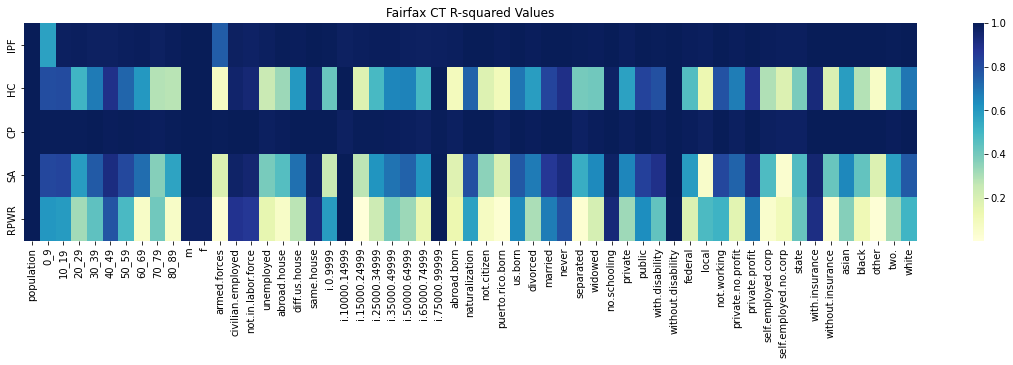

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,4))
plt.title("Fairfax CT R-squared Values")
sns.heatmap(result_df, annot=False, cmap="YlGnBu")